In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


import sys
sys.path.append('..')

import modules.plotting as pl
import modules.phase_detection as pde
import modules.linear_algebra as lin
import modules.sliding_window as sw
import modules.numpy_funcs as nf
import modules.iterable_funcs as itf




In [2]:
direction_pass = np.array([ 0.99700402, -0.03897947,  0.0668101 ])

foot_points = np.array([[-118.871  ,  -60.1586 ,  256.61   ],
       [-123.251  ,  -58.8779 ,  255.139  ],
       [-114.442  ,  -61.8221 ,  243.067  ],
       [-105.28   ,  -64.049  ,  241.183  ],
       [ -82.7339 ,  -63.8254 ,  242.469  ],
       [ -75.9796 ,  -62.6394 ,  243.473  ],
       [ -65.5047 ,  -64.6145 ,  247.966  ],
       [ -62.9434 ,  -63.8746 ,  251.189  ],
       [ -63.4366 ,  -65.5408 ,  250.683  ],
       [ -63.854  ,  -62.2273 ,  250.725  ],
       [ -62.4431 ,  -62.667  ,  250.676  ],
       [ -61.2525 ,  -65.5936 ,  251.18   ],
       [ -62.8147 ,  -64.716  ,  250.87   ],
       [ -68.4298 ,  -62.4568 ,  251.841  ],
       [ -66.416  ,  -60.7126 ,  250.66   ],
       [ -61.2657 ,  -63.1047 ,  249.697  ],
       [ -61.7823 ,  -62.6742 ,  249.474  ],
       [ -58.3991 ,  -64.301  ,  253.923  ],
       [ -59.1908 ,  -62.1739 ,  250.891  ],
       [ -59.6634 ,  -61.0141 ,  249.47   ],
       [ -64.5977 ,  -65.0449 ,  250.157  ],
       [ -63.4983 ,  -60.2053 ,  248.335  ],
       [ -61.0158 ,  -63.8153 ,  249.566  ],
       [ -57.6708 ,  -60.8613 ,  248.987  ],
       [ -55.8883 ,  -58.6001 ,  248.168  ],
       [ -52.8298 ,  -57.6507 ,  248.617  ],
       [ -44.1293 ,  -57.6657 ,  246.641  ],
       [ -39.735  ,  -57.75   ,  246.691  ],
       [ -32.9796 ,  -60.193  ,  247.305  ],
       [ -25.5536 ,  -63.1198 ,  246.549  ],
       [  -9.78502,  -60.112  ,  246.506  ],
       [  -1.4662 ,  -67.5963 ,  248.762  ],
       [   9.3279 ,  -68.3859 ,  250.933  ],
       [  20.7449 ,  -66.753  ,  248.923  ],
       [  37.3554 ,  -69.2636 ,  249.832  ],
       [  43.7594 ,  -67.831  ,  251.393  ],
       [  44.9155 ,  -68.2272 ,  252.772  ],
       [  48.6453 ,  -68.4774 ,  254.766  ],
       [  45.4045 ,  -66.9905 ,  255.149  ],
       [  49.1395 ,  -67.6327 ,  256.652  ],
       [  44.5888 ,  -67.505  ,  256.267  ],
       [  45.6688 ,  -65.4955 ,  255.449  ],
       [  44.4945 ,  -65.63   ,  256.974  ],
       [  45.805  ,  -64.815  ,  255.852  ],
       [  47.7329 ,  -68.1672 ,  254.697  ],
       [  49.6981 ,  -66.088  ,  255.261  ],
       [  50.9608 ,  -67.6679 ,  256.768  ],
       [  45.0309 ,  -64.8821 ,  254.897  ],
       [  51.5246 ,  -65.4614 ,  254.915  ],
       [  54.8228 ,  -65.769  ,  254.893  ],
       [  57.7816 ,  -62.5103 ,  254.958  ],
       [  93.2984 ,  -63.0568 ,  260.703  ],
       [ 103.356  ,  -65.453  ,  270.022  ],
       [ 117.645  ,  -69.7119 ,  260.067  ],
       [ 104.272  ,  -69.1605 ,  276.357  ],
       [ 102.388  ,  -69.1205 ,  277.391  ],
       [ 107.777  ,  -63.9681 ,  276.709  ]])

In [3]:
step_signal = lin.line_coordinate_system(np.zeros(3), direction_pass, foot_points)

In [4]:
is_stance = pde.detect_phases(step_signal)



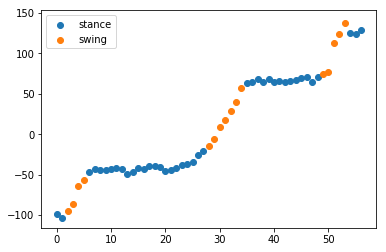

In [5]:
indices = [i for i, _ in enumerate(step_signal)]
points = np.column_stack((indices, step_signal))

pl.scatter_labels(points, ~is_stance)

plt.legend(['stance', 'swing'])

In [6]:
phase_labels = np.fromiter(itf.label_repeated_elements(is_stance), 'int')

In [7]:
is_edge_frame = (phase_labels==0) | (phase_labels==phase_labels.max())

is_stance[is_edge_frame] = False

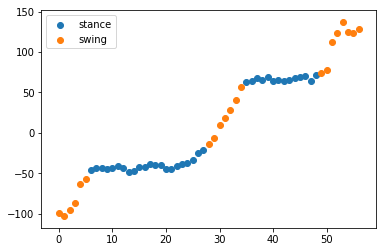

In [8]:
pl.scatter_labels(points, ~is_stance)

plt.legend(['stance', 'swing'])